In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
input=pd.read_csv('http://bit.ly/w-data')
input

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


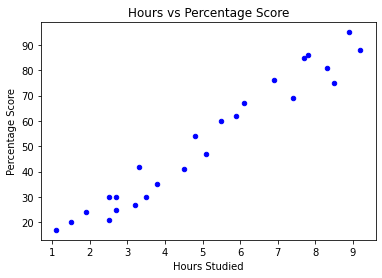

In [ ]:
input.plot(kind='scatter',x='Hours',y='Scores',color='blue')
plt.title('Hours vs Percentage Score') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

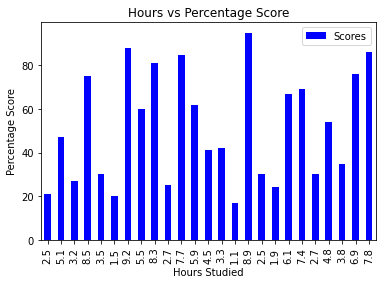

In [ ]:
input.plot(kind='bar',x='Hours',y='Scores',color='blue')
plt.title('Hours vs Percentage Score') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

Text(0, 0.5, 'Percentage Score')

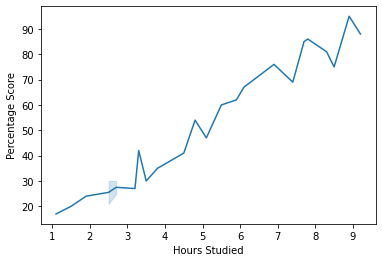

In [ ]:
sns.lineplot(x = input["Hours"] , y = input["Scores"])
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

Text(0, 0.5, 'Percentage Score')

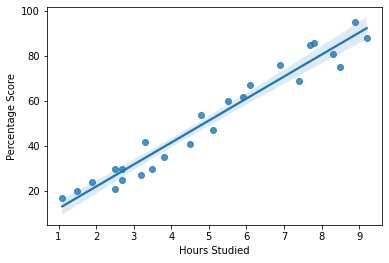

In [ ]:
sns.regplot(x = input["Hours"] , y = input["Scores"])
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

In [ ]:
pip install sklearn

In [ ]:

from sklearn.model_selection import train_test_split
X = input.iloc[:, :-1].values  
y = input.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [ ]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [ ]:
# Fitting Simple Linear Regression to the Training set
#Train the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

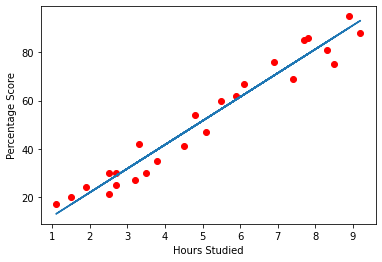

In [ ]:
#regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y, color='red')
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

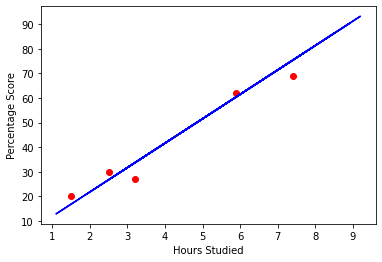

In [ ]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
print("Intercept:",regressor.intercept_)
print("Slope:",regressor.coef_)

Intercept: 2.018160041434662
Slope: [9.91065648]


In [ ]:
# Predicting the Test set results
y_test_pred = regressor.predict(X_test)
y_test_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
#If R2 is equal to 0, then the dependent variable cannot be predicted from the independent variable.
#If R2 is equal to 1, then the dependent variable can be predicted from the independent variable without any error.
y_train_pred = regressor.predict(X_train)


In [ ]:
# Comparing Actual vs Predicted
input = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
input

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:

from sklearn import metrics
print("R2(Training):",metrics.r2_score(y_train,y_train_pred))

R2(Training): 0.9515510725211552


In [ ]:
from sklearn import metrics
print("R2(Testing) ",metrics.r2_score(y_test, y_test_pred))

R2(Testing)  0.9454906892105354


In [ ]:
model_score=regressor.score(X_train,y_train)
print("Model Score(Training):{:.4f}".format(model_score))

Model Score(Training):0.9516


In [ ]:
model_score=regressor.score(X_test,y_test)
print("Model Score(Testing):{:.4f}".format(model_score))

Model Score(Testing):0.9455


In [ ]:
from sklearn import metrics
print("Mean Absolute Error(MAE):",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error(MAE):",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error(RMSE):",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE): 4.183859899002982
Mean Squared Error(MAE): 21.598769307217456
Root Mean Squared Error(RMSE): 4.647447612100373


In [ ]:
# Predicting the Test set results
final_ans = regressor.predict([[9.25]])
print("The predicted score for the student who study for 9.25 hrs/day is {}".format(final_ans[0]))

The predicted score for the student who study for 9.25 hrs/day is 93.69173248737539
